In [27]:
import numpy as np
import pandas as pd

from astropy import units as u
from astropy import coordinates as coord

# Units Package
Lets test the units package

In [4]:
E = 10 * u.TeV

In [19]:
E.value
E.unit

Unit("TeV")

In [21]:
Energies = [10,30,40] * u.Joule
Energies

<Quantity [10., 30., 40.] J>

In [22]:
Energies[0]

<Quantity 10. J>

In [15]:
type(E)

astropy.units.quantity.Quantity

In [26]:
dist = 1 * u.parsec
dist.to(u.km)

<Quantity 3.08567758e+13 km>

# Coordinates

In [33]:
c = coord.SkyCoord(ra=23.47*u.deg, dec=1.15*u.deg, frame='fk5')

In [30]:
c.galactic

<SkyCoord (Galactic): (l, b) in deg
    (144.49029331, -59.93331799)>

In [34]:
c.ra

<Longitude 23.47 deg>

In [35]:
c.dec

<Latitude 1.15 deg>

In [36]:
c.ra.hour

1.5646666666666669

In [40]:
c.cartesian

<CartesianRepresentation (x, y, z) [dimensionless]
    (0.91708398, 0.39818862, 0.02006994)>

In [45]:
c1 = coord.SkyCoord(ra=222*u.deg, dec=4.5*u.deg, distance=42*u.Mpc)
c2 = coord.SkyCoord(ra=12*u.deg, dec=-40.5*u.deg, distance=420*u.Mpc)

In [47]:
c1.separation_3d(c2)

<Distance 450.69174192 Mpc>

In [48]:
coord.SkyCoord.from_name('Mrk501') #search database

<SkyCoord (ICRS): (ra, dec) in deg
    (253.46756884, 39.76016736)>

# Read fits

In [49]:
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename

In [50]:
filename = get_pkg_data_filename('tutorials/FITS-images/HorseHead.fits')

In [51]:
hdu = fits.open(filename)

In [53]:
hdu.info() #just printing information

Filename: /Users/Punda/.astropy/cache/download/py3/2c9202ae878ecfcb60878ceb63837f5f
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     161   (891, 893)   int16   
  1  er.mask       1 TableHDU        25   1600R x 4C   [F6.2, F6.2, F6.2, F6.2]   


In [86]:
hdu[1]

In [54]:
image_data = hdu[0].data
image_header = hdu[0].header

In [89]:
image_header

SIMPLE  =                    T /FITS: Compliance                                
BITPIX  =                   16 /FITS: I*2 Data                                  
NAXIS   =                    2 /FITS: 2-D Image Data                            
NAXIS1  =                  891 /FITS: X Dimension                               
NAXIS2  =                  893 /FITS: Y Dimension                               
EXTEND  =                    T /FITS: File can contain extensions               
DATE    = '2014-01-09        '  /FITS: Creation Date                            
ORIGIN  = 'STScI/MAST'         /GSSS: STScI Digitized Sky Survey                
SURVEY  = 'SERC-ER '           /GSSS: Sky Survey                                
REGION  = 'ER768   '           /GSSS: Region Name                               
PLATEID = 'A0JP    '           /GSSS: Plate ID                                  
SCANNUM = '01      '           /GSSS: Scan Number                               
DSCNDNUM= '00      '        

In [55]:
image_data.shape

(893, 891)

In [58]:
np.max(image_data, axis=None) #axis=0,1 for x or y axis

22918

In [59]:
import matplotlib.pyplot as plt

In [61]:
image_data.flatten().shape

(795663,)

In [62]:
893*891

795663

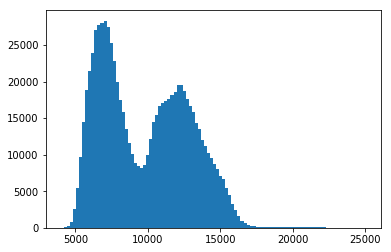

In [64]:
plt.hist(image_data.flatten(), bins=100, range=[4000,25000]) #use range when you have nan in your data
plt.show()

In [69]:
image_data[~np.isnan(image_data)] #~ is a negator

array([ 7201,  6642,  6642, ..., 11987, 12546, 12546], dtype=int16)

In [70]:
np.isnan(np.inf)

False

In [91]:
import matplotlib.cm as cm
from astropy.wcs import WCS
from astropy.visualization.wcsaxes import WCSAxes
from matplotlib.colors import LogNorm

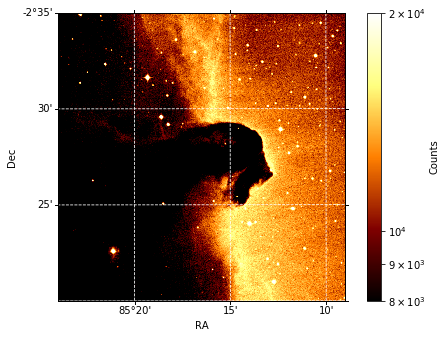

In [105]:
fig = plt.figure()

wcs = WCS(image_header)
ax = WCSAxes(fig, [0,0,1,1], wcs=wcs)
fig.add_axes(ax)

plt.imshow(image_data, cmap=cm.afmhot, norm=LogNorm(), vmin = 8000, vmax=20000) #vlim is limiting the colourbar range

cb = plt.colorbar()
cb.set_label('Counts')
#plt.clim(1.1*np.min(image_data),np.max(image_data))


plt.grid(color='white', ls='--')

plt.xlabel('RA')
plt.ylabel('Dec')

#plt.tight_layout()
plt.savefig('test.eps', bbox_inches='tight')

In [83]:
import astropy
astropy.__version__

'3.0.2'